In [1]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#отображение графиков в ноутбуке
%matplotlib inline 

#для четкой прорисовки графиков
#%config InlineBackend.figure_format = 'svg'

def read_energy(file: str) -> tuple[np.ndarray, np.ndarray]:
    x_vals = []
    y_vals = []
    with open(file) as f:
        for s in f.readlines():
            time, energy = map(float, s.split())
            x_vals.append(time)
            y_vals.append(energy)
    return np.array(x_vals), np.array(y_vals)

def sliding_average(arr: np.ndarray, window):
    return np.convolve(arr, [1] * window, 'same') / window

a = np.array([3, 0, 3])
sliding_average(a, 3)

array([1., 2., 1.])

# Stress vs strain

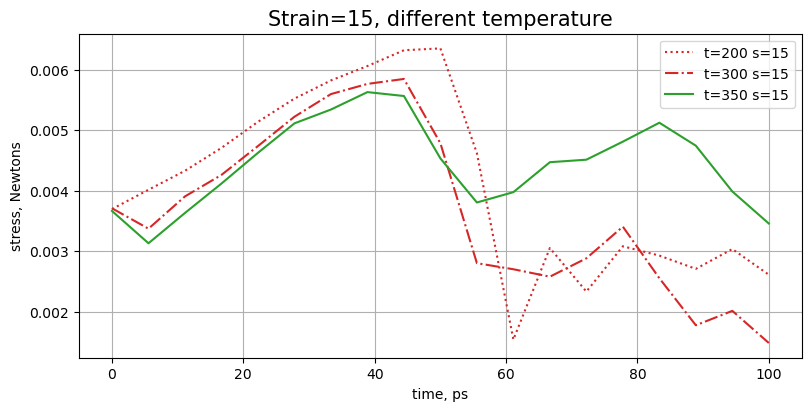

In [2]:
#base_path = "../buildDir/milestones/09/"
base_path = "data-milestone-09/"
x, stress1 = read_energy(base_path + "stress-1.txt")
x, stress2 = read_energy(base_path + "stress-2.txt")
x, stress3 = read_energy(base_path + "stress-3.txt")
x, stress4 = read_energy(base_path + "stress-4.txt")
x, stress5 = read_energy(base_path + "stress-5.txt")

x = np.linspace(0, 100, len(stress1))
fig, axs = plt.subplots(1, 1, layout='constrained', figsize=(8,4))

axs.set_title('Strain=15, different temperature',fontsize=15)
axs.plot(x, stress5, linestyle=':', color='tab:red', label='t=200 s=15')
axs.plot(x, stress2, linestyle='-.', color='tab:red', label='t=300 s=15')
axs.plot(x, stress4, linestyle='-', color='tab:green', label='t=350 s=15')

axs.grid(True)
axs.set_xlabel('time, ps',  fontsize=10)
axs.set_ylabel('stress, Newtons',  fontsize=10)
axs.legend(fontsize=10)

fig.savefig("fig.pdf")

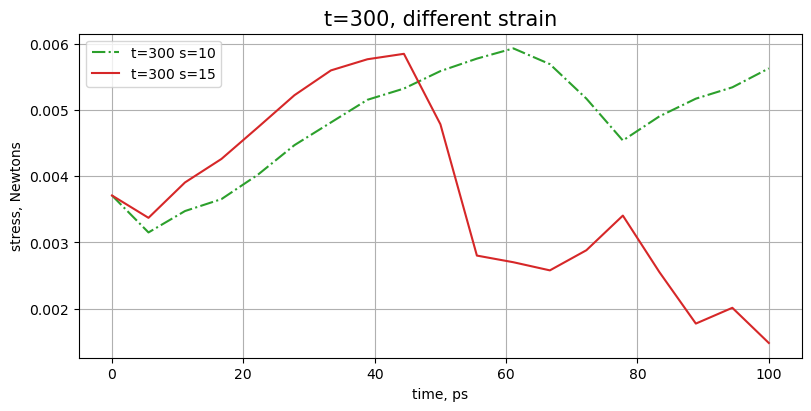

In [3]:
fig, axs = plt.subplots(1, 1, layout='constrained', figsize=(8,4))

axs.set_title('t=300, different strain',fontsize=15)
axs.plot(x, stress1, linestyle='-.', color='tab:green', label='t=300 s=10')
axs.plot(x, stress2, linestyle='-', color='tab:red', label='t=300 s=15')

axs.grid(True)
axs.set_xlabel('time, ps',  fontsize=10)
axs.set_ylabel('stress, Newtons',  fontsize=10)
axs.legend(fontsize=10)

fig.savefig("fig.pdf")

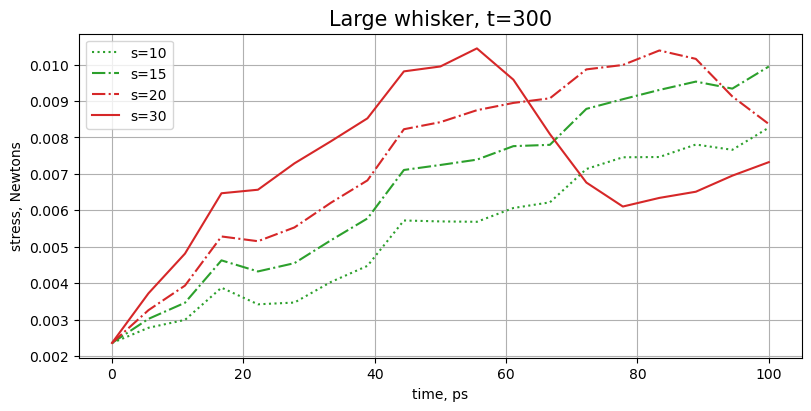

In [9]:
x, stress10 = read_energy(base_path + "stress-10.txt")
x, stress11 = read_energy(base_path + "stress-11.txt")
x, stress12 = read_energy(base_path + "stress-12.txt")
x, stress13 = read_energy(base_path + "stress-13.txt")
x, stress14 = read_energy(base_path + "stress-14.txt")
x, stress15 = read_energy(base_path + "stress-15.txt")

x = np.linspace(0, 100, len(stress1))
fig, axs = plt.subplots(1, 1, layout='constrained', figsize=(8,4))

axs.set_title('Large whisker, t=300',fontsize=15)
axs.plot(x, stress10, linestyle=':', color='tab:green', label='s=10')
axs.plot(x, stress11, linestyle='-.', color='tab:green', label='s=15')
axs.plot(x, stress14, linestyle='-.', color='tab:red', label='s=20')
axs.plot(x, stress15, linestyle='-', color='tab:red', label='s=30')

axs.grid(True)
axs.set_xlabel('time, ps',  fontsize=10)
axs.set_ylabel('stress, Newtons',  fontsize=10)
axs.legend(fontsize=10)

fig.savefig("fig.pdf")